In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [ ]:
data = pd.read_csv("FineTech_appData.csv")

In [ ]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.shape

(50000, 12)

In [ ]:
for i in range(5):
  print(data.loc[i,"screen_list"],'/n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login /n
joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 /n
Splash,Cycle,Loan /n
product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 /n
idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review /n


In [ ]:
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [ ]:
features = data.columns
for i in features:
  print(f'unique value of {i} is {data[i].unique()} and len is {len(data[i].unique())}')

unique value of user is [235136 333588 254414 ... 302367 324905  27047] and len is 49874
unique value of first_open is ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] and len is 49747
unique value of dayofweek is [3 6 1 4 2 0 5] and len is 7
unique value of hour is [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] and len is 24
unique value of age is [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81 

In [ ]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [ ]:
data['hour'] = data.hour.str.slice(1,3).astype(int)

In [ ]:
data1 = data.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

In [ ]:
data1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


Text(0.5, 1.0, 'Heatmap using correlation')

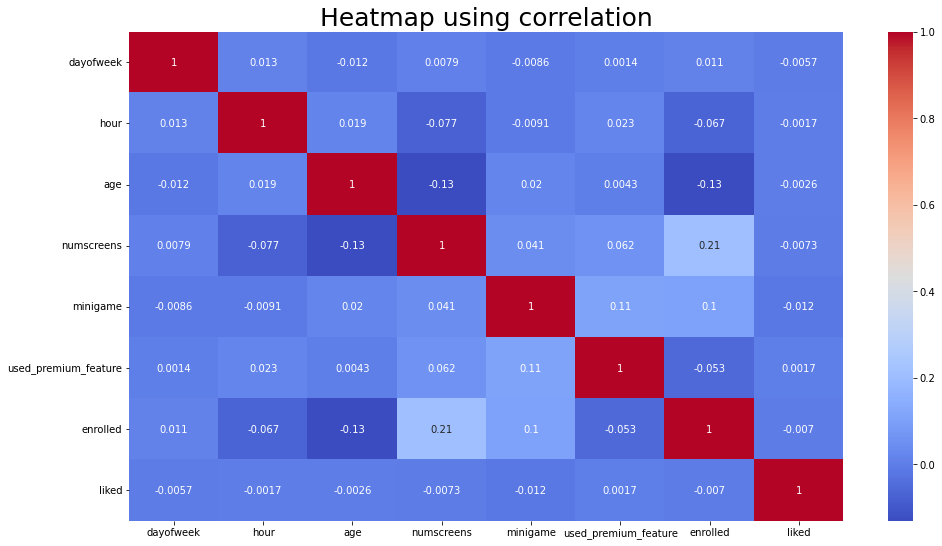

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data1.corr(),annot=True,cmap= 'coolwarm')
plt.title("Heatmap using correlation",fontsize=25)

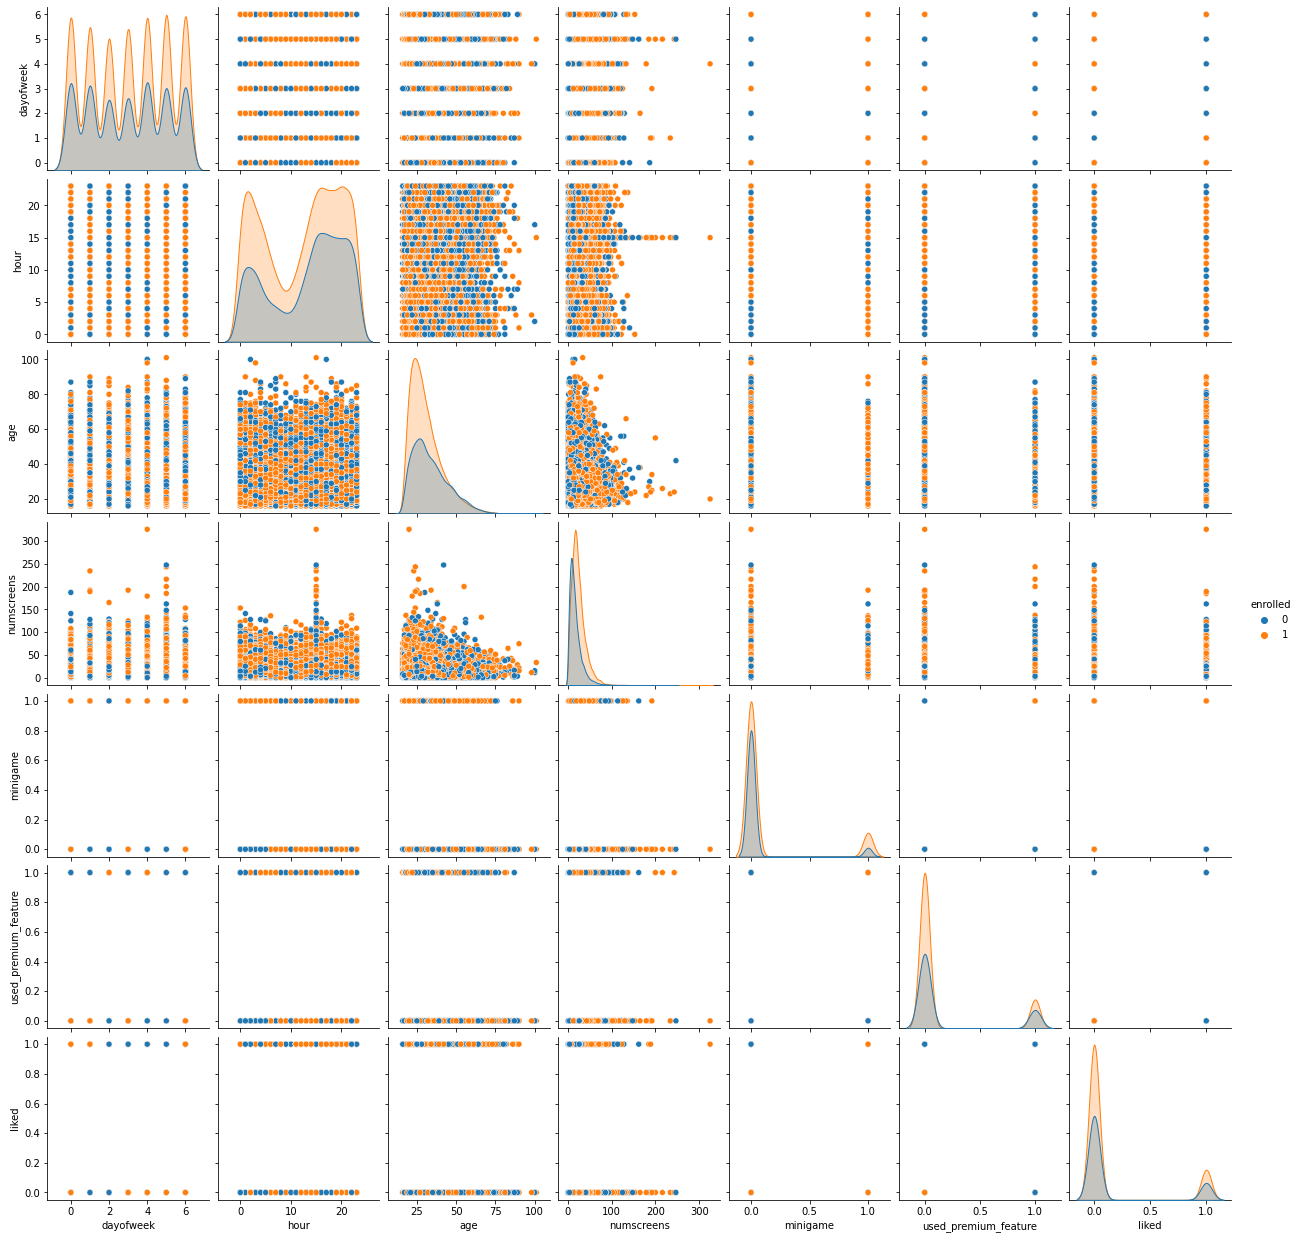

In [ ]:
sns.pairplot(data1,hue='enrolled')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


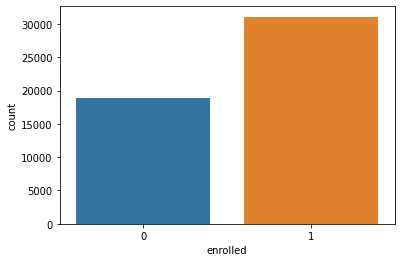

In [ ]:
sns.countplot(data1.enrolled)

In [ ]:
print("Enrolled no is",(data1.enrolled<1).sum())
print("Not enrolled is",(data1.enrolled==1).sum())

Enrolled no is 18926
Not enrolled is 31074


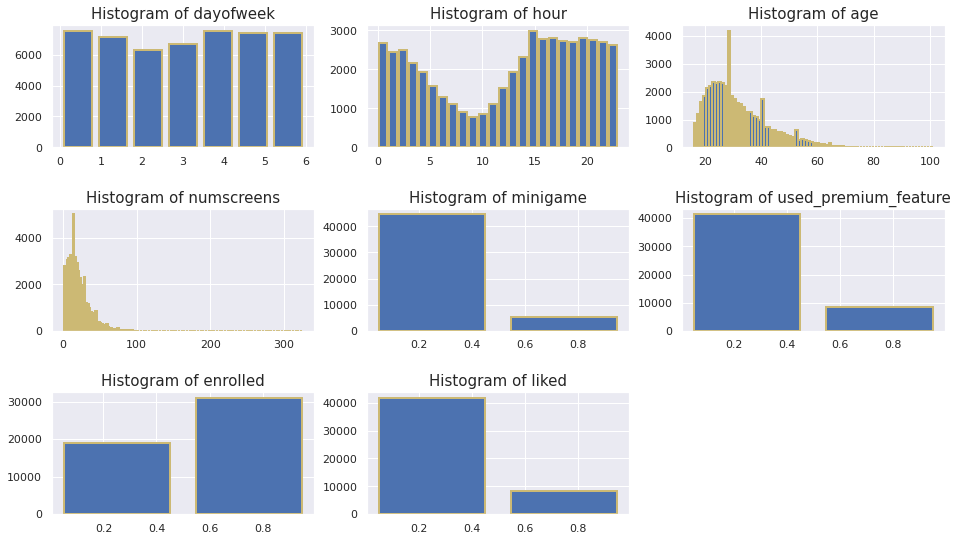

In [ ]:
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = data1.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(data1[j].unique()) # bins for histogram
    plt.hist(data1[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
    
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots) *****code 8

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


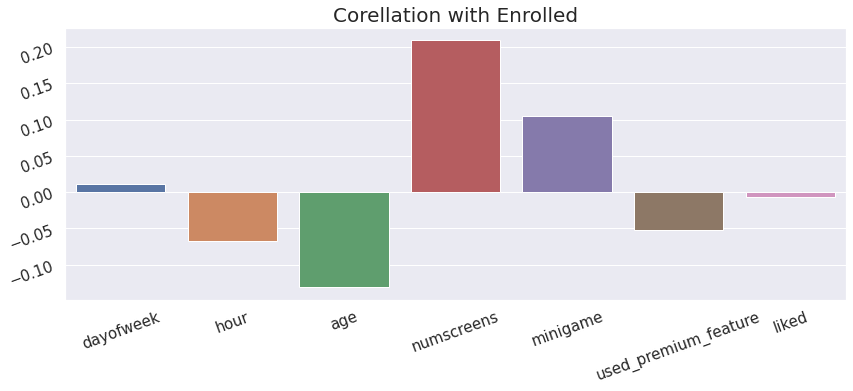

In [ ]:
sns.set()
plt.figure(figsize=(14,5))
plt.title("Corellation with Enrolled",fontsize=20)
data3 = data1.drop(['enrolled'],axis=1)
ax = sns.barplot(data3.columns,data3.corrwith(data.enrolled))
ax.tick_params(labelsize=15,labelrotation=20,color="k")

In [ ]:
data['first_open'].dtype
data['first_open'] =[parser.parse(i) for i in data['first_open']]
data['enrolled_date'] = [parser.parse(i) if isinstance(i,str) else i for i in data['enrolled_date']]

data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [ ]:
data['time_to_enrolled'] = (data.first_open-data.enrolled_date).astype('timedelta64[h]')

In [ ]:
data.drop(columns=['time_to_enrolled','first_open','enrolled_date'],inplace=True)

In [ ]:
screen_data = pd.read_csv("top_screens.csv").top_screens

In [ ]:
screen_data

0                       Loan2
1                    location
2                Institutions
3            Credit3Container
4                 VerifyPhone
5            BankVerification
6           VerifyDateOfBirth
7                 ProfilePage
8               VerifyCountry
9                       Cycle
10                   idscreen
11           Credit3Dashboard
12                      Loan3
13                CC1Category
14                     Splash
15                       Loan
16                        CC1
17           RewardsContainer
18                    Credit3
19                    Credit1
20                EditProfile
21                    Credit2
22                   Finances
23                        CC3
24                    Saving9
25                    Saving1
26                     Alerts
27                    Saving8
28                   Saving10
29                Leaderboard
30                    Saving4
31               VerifyMobile
32              VerifyHousing
33        

In [ ]:
data['screen_list'] = data.screen_list.astype(str) + ','
data['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                      Splash,Cycle,Loan,,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                 Cycle,Splash,Home,RewardsContainer,,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [ ]:
for i in screen_data:
  data[i] = data.screen_list.str.contains(i).astype(int)
  data['screen_list'] = data.screen_list.str.replace(i+',','')
data['screen_list']

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                        ,
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                               Home,,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [ ]:
data['remaining_screen_list'] = data.screen_list.str.count(',')
data['remaining_screen_list']
data.drop(columns = ['screen_list'],inplace = True)

In [ ]:
data.shape

(50000, 68)

In [ ]:
saving_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
data['saving_screen'] = data[saving_screens].sum(axis=1)
data.drop(columns=saving_screens,inplace = True)

In [ ]:
credit_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
data['credit_screen'] = data[credit_screens].sum(axis=1)
data.drop(columns=credit_screens,inplace = True)

KeyError: ignored

In [ ]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
data['cc_screens_count'] = data[cc_screens].sum(axis = 1)
data.drop(columns = cc_screens, inplace = True)

KeyError: ignored

In [ ]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
data['loan_screens_count'] = data[loan_screens].sum(axis = 1)
data.drop(columns = loan_screens, inplace = True)

In [ ]:
data.shape

(50000, 50)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

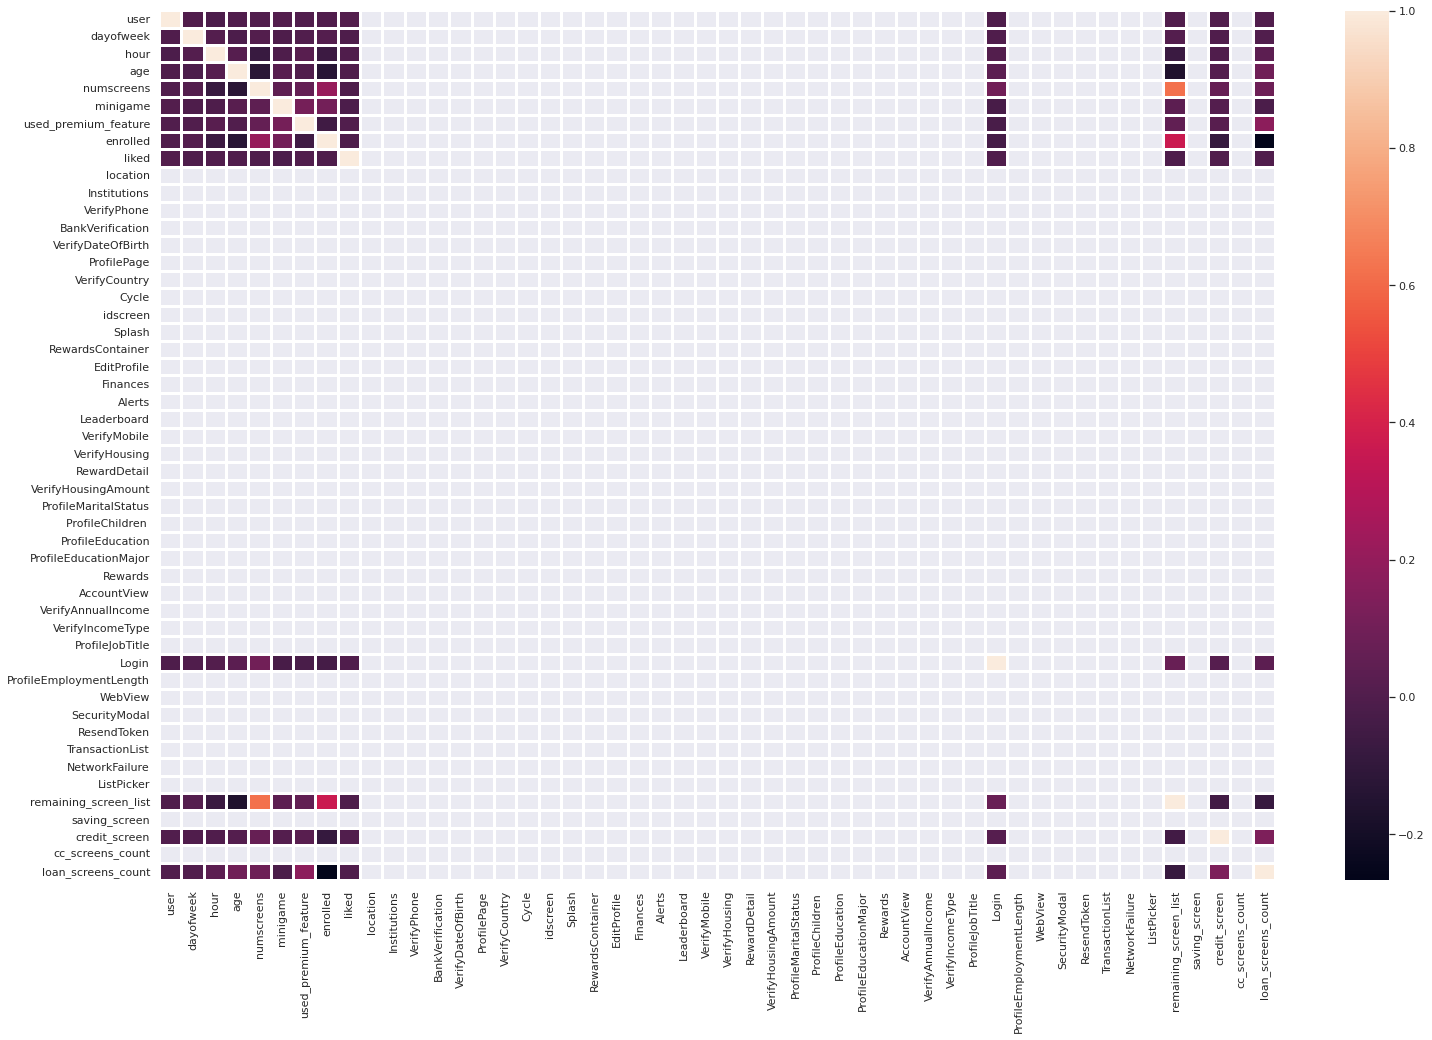

In [ ]:
plt.figure(figsize = (25,16)) 
sns.heatmap(data.corr(), annot = False, linewidth =2)

In [ ]:
clean_data = data
target = data['enrolled']
data.drop(columns=['enrolled'],inplace = True)

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0)

In [ ]:
train_user_id = X_train['user']
X_train.drop(columns='user',inplace = True)
test_user_id = X_test['user']
X_test.drop(columns='user',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(X_train.shape)
print(X_test.shape)

(40000, 48)
(10000, 48)


In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.6382

In [75]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.6397

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.6571

In [78]:
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.6919